In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygal
plt.style.use("ggplot")
%matplotlib inline

In [2]:
df=pd.read_csv("cleaned2.csv")
df.head()

/Users/debbie/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,vote,title,rank,cat1,cat2
0,4.0,True,2014-07-03,A2LSKD2H9U8N0J,B000FA5KK0,"pretty good story, a little exaggerated, but I...",pretty good story,0,NaN,"5,062,792 Paid in Kindle Store (",Kindle eBooks,Literature & Fiction
1,5.0,True,2014-05-26,A2QP13XTJND1QS,B000FA5KK0,"If you've read other max brand westerns, you k...",A very good book,0,NaN,"5,062,792 Paid in Kindle Store (",Kindle eBooks,Literature & Fiction
2,5.0,True,2016-09-16,A8WQ7MAG3HFOZ,B000FA5KK0,"Love Max, always a fun twist",Five Stars,0,NaN,"5,062,792 Paid in Kindle Store (",Kindle eBooks,Literature & Fiction
3,5.0,True,2016-03-03,A1E0MODSRYP7O,B000FA5KK0,"As usual for him, a good book",a good,0,NaN,"5,062,792 Paid in Kindle Store (",Kindle eBooks,Literature & Fiction
4,5.0,True,2015-09-10,AYUTCGVSM1H7T,B000FA5KK0,MB is one of the original western writers and ...,A Western,2,NaN,"5,062,792 Paid in Kindle Store (",Kindle eBooks,Literature & Fiction


In [3]:
df1=df[["overall","reviewTime","reviewText","rank","cat1","cat2"]]
df_test=df1.loc[df1.cat2=='Travel',:]
df_test.head()

,overall,reviewTime,reviewText,rank,cat1,cat2
488,2.0,2016-03-06,Heartbreaking. I found this in the library an...,"217,278 Paid in Kindle Store (",Kindle eBooks,Travel
489,5.0,2013-04-22,I kept hoping that Ms. Mayes returned to her ...,"217,278 Paid in Kindle Store (",Kindle eBooks,Travel
490,4.0,2011-12-10,"When I saw this book was being published, I im...","217,278 Paid in Kindle Store (",Kindle eBooks,Travel
491,2.0,2009-01-18,I have never read any of Ms. Mayes previous bo...,"217,278 Paid in Kindle Store (",Kindle eBooks,Travel
492,2.0,2007-01-03,"As with many of the other reviewers, I loved U...","217,278 Paid in Kindle Store (",Kindle eBooks,Travel


In [4]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))

filepath = ('NRC-Sentiment-Emotion-Lexicons/NRC-Emotion-Lexicon-v0.92/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt')
emo_df = pd.read_csv(filepath,names=["word", "emotion", "association"],sep='\t')
emo_words = emo_df.pivot(index='word',columns='emotion',values='association').reset_index()
emotions = emo_words.columns.drop('word')
emo_words.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/debbie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,NaN,0,0,0,0,0,0,0,0,0,0
1,aback,0,0,0,0,0,0,0,0,0,0
2,abacus,0,0,0,0,0,0,0,0,0,1
3,abandon,0,0,0,1,0,1,0,1,0,0
4,abandoned,1,0,0,1,0,1,0,1,0,0


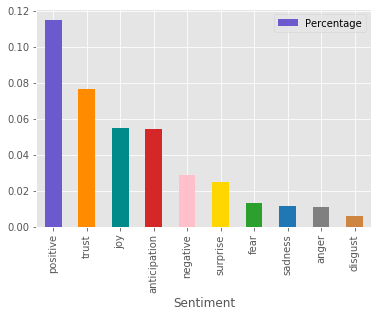

In [5]:
def plot_sentiment_bar(category,df1):
    df_test=df1.loc[df1.cat2==category,:]
    text=[]
    whitespace_wt = nltk.WhitespaceTokenizer()
    for review in list(df_test.reviewText):
        words=whitespace_wt.tokenize(str(review))
        for word in words:
            word = stemmer.stem(word.lower())
            if word not in stop_words:
                if word.isalpha():
                    text.append(word)
    word_count=len(text)
    
    feelings=[0]*10
    for word in text:
        emo_score = emo_words[emo_words.word == word]
        if not emo_score.empty:
            temp=[]
            for emotion in list(emotions):
                temp.append(int(emo_score[emotion]))
            feelings=[i+j for i,j in zip(temp,feelings)]
    
    colors=["slateblue","darkorange","darkcyan","tab:red","pink","gold","tab:green","tab:blue","gray","peru"]
    df_feelings_percentage = pd.DataFrame({"Sentiment":list(emotions), "Percentage":feelings})
    df_feelings_percentage.Percentage = df_feelings_percentage.Percentage.apply(lambda x: x/word_count)
    df_feelings_percentage = df_feelings_percentage.sort_values(axis=0,ascending=False,by=['Percentage'])
    df_feelings_percentage.reset_index(drop=True, inplace=True)
    df_feelings_percentage.plot(kind = "bar", x = "Sentiment", y = "Percentage",color=colors)
    
plot_sentiment_bar("Travel",df1)

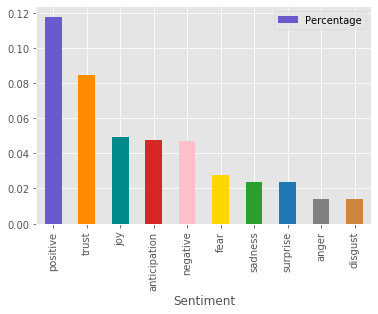

In [6]:
plot_sentiment_bar("Medical eBooks",df1)

## Trend

In [7]:
df_test=df1.loc[df1.cat2=='Travel',:]
df_test.loc[:,'reviewTime']=df_test.reviewTime.apply(lambda x: x.split('-')[0])

/Users/debbie/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
np.unique(df_test.reviewTime)

array(['2006', '2007', '2009', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018'], dtype=object)

In [9]:
df_test.head()

,overall,reviewTime,reviewText,rank,cat1,cat2
488,2.0,2016,Heartbreaking. I found this in the library an...,"217,278 Paid in Kindle Store (",Kindle eBooks,Travel
489,5.0,2013,I kept hoping that Ms. Mayes returned to her ...,"217,278 Paid in Kindle Store (",Kindle eBooks,Travel
490,4.0,2011,"When I saw this book was being published, I im...","217,278 Paid in Kindle Store (",Kindle eBooks,Travel
491,2.0,2009,I have never read any of Ms. Mayes previous bo...,"217,278 Paid in Kindle Store (",Kindle eBooks,Travel
492,2.0,2007,"As with many of the other reviewers, I loved U...","217,278 Paid in Kindle Store (",Kindle eBooks,Travel


### Calculated all customers reviews together

In [10]:
years=list(np.unique(df_test['reviewTime']))
df_year_feelings = pd.DataFrame(0, index=years, columns=emotions)
words_num=[]
for year in years:
    df_year=df_test.loc[df_test.reviewTime==year,:]
    text=[]
    whitespace_wt = nltk.WhitespaceTokenizer()
    for review in list(df_year.reviewText):
        words=whitespace_wt.tokenize(str(review))
        for word in words:
            word = stemmer.stem(word.lower())
            if word not in stop_words:
                if word.isalpha():
                    text.append(word)
    word_count=len(text)
    words_num.append(word_count)
    
    feelings=[0]*10
    for word in text:
        emo_score = emo_words[emo_words.word == word]
        if not emo_score.empty:
            temp=[]
            for emotion in list(emotions):
                temp.append(int(emo_score[emotion]))
            feelings=[i+j for i,j in zip(temp,feelings)]
    
    df_year_feelings.loc[year]=feelings

In [11]:
df_year_feelings.to_csv("Travel_feelings.csv")

In [12]:
df_year_feelings=pd.read_csv("Travel_feelings.csv")
name_list=list(df_year_feelings.columns)
name_list[0]='year'
df_year_feelings.columns=name_list
df_year_feelings

,year,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,2006,0,25,1,5,31,15,58,6,5,33
1,2007,2,11,3,3,21,7,40,2,9,20
2,2009,3,5,2,1,3,7,8,2,1,4
3,2011,13,71,15,27,67,56,158,27,26,94
4,2012,128,363,47,145,343,289,775,124,155,522
5,2013,119,643,57,146,645,325,1360,117,309,891
6,2014,195,1062,113,229,989,537,2190,197,503,1511
7,2015,124,753,60,145,804,301,1538,115,337,983
8,2016,72,303,52,93,343,161,684,96,142,471
9,2017,18,117,15,23,118,67,275,28,46,179


In [13]:
df_year_feelings=pd.read_csv("Travel_feelings.csv")
name_list=list(df_year_feelings.columns)
name_list[0]='year'
df_year_feelings.columns=name_list
df_year_feelings["total_words"]=words_num
for emotion in list(emotions):
    df_year_feelings[emotion]=df_year_feelings[emotion]/df_year_feelings["total_words"]

In [14]:
df_year_feelings

,year,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,total_words
0,2006,0.000000,0.044803,0.001792,0.008961,0.055556,0.026882,0.103943,0.010753,0.008961,0.059140,558
1,2007,0.010101,0.055556,0.015152,0.015152,0.106061,0.035354,0.202020,0.010101,0.045455,0.101010,198
2,2009,0.044776,0.074627,0.029851,0.014925,0.044776,0.104478,0.119403,0.029851,0.014925,0.059701,67
3,2011,0.006474,0.035359,0.007470,0.013446,0.033367,0.027888,0.078685,0.013446,0.012948,0.046813,2008
4,2012,0.017743,0.050319,0.006515,0.020100,0.047546,0.040061,0.107430,0.017189,0.021486,0.072359,7214
5,2013,0.010398,0.056187,0.004981,0.012758,0.056361,0.028399,0.118840,0.010224,0.027001,0.077857,11444
6,2014,0.009768,0.053198,0.005660,0.011471,0.049542,0.026900,0.109703,0.009868,0.025197,0.075690,19963
7,2015,0.010526,0.063922,0.005093,0.012309,0.068251,0.025552,0.130560,0.009762,0.028608,0.083447,11780
8,2016,0.011917,0.050149,0.008606,0.015392,0.056769,0.026647,0.113208,0.015889,0.023502,0.077954,6042
9,2017,0.007944,0.051633,0.006620,0.010150,0.052074,0.029568,0.121359,0.012357,0.020300,0.078994,2266


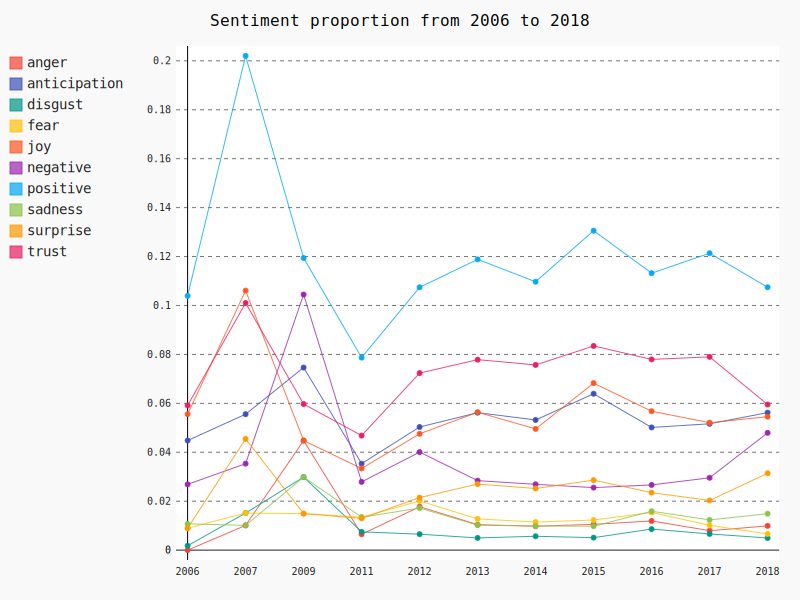

In [15]:
line_chart = pygal.Line()
line_chart.title = 'Sentiment proportion from 2006 to 2018'
line_chart.x_labels = df_year_feelings.year
for emotion in list(emotions):
       line_chart.add(emotion, list(df_year_feelings[emotion]))
line_chart.render_in_browser()
line_chart.render_to_file('chart1.svg')

### Focus reviews created during years from 2011 to 2018

In [16]:
selected=list(range(2011,2019))
df_year_feelings_2011_2018=df_year_feelings.loc[
                    df_year_feelings.year.apply(lambda x: True if x in selected else False),:]
df_year_feelings_2011_2018

,year,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,total_words
3,2011,0.006474,0.035359,0.007470,0.013446,0.033367,0.027888,0.078685,0.013446,0.012948,0.046813,2008
4,2012,0.017743,0.050319,0.006515,0.020100,0.047546,0.040061,0.107430,0.017189,0.021486,0.072359,7214
5,2013,0.010398,0.056187,0.004981,0.012758,0.056361,0.028399,0.118840,0.010224,0.027001,0.077857,11444
6,2014,0.009768,0.053198,0.005660,0.011471,0.049542,0.026900,0.109703,0.009868,0.025197,0.075690,19963
7,2015,0.010526,0.063922,0.005093,0.012309,0.068251,0.025552,0.130560,0.009762,0.028608,0.083447,11780
8,2016,0.011917,0.050149,0.008606,0.015392,0.056769,0.026647,0.113208,0.015889,0.023502,0.077954,6042
9,2017,0.007944,0.051633,0.006620,0.010150,0.052074,0.029568,0.121359,0.012357,0.020300,0.078994,2266
10,2018,0.009917,0.056198,0.004959,0.006612,0.054545,0.047934,0.107438,0.014876,0.031405,0.059504,605


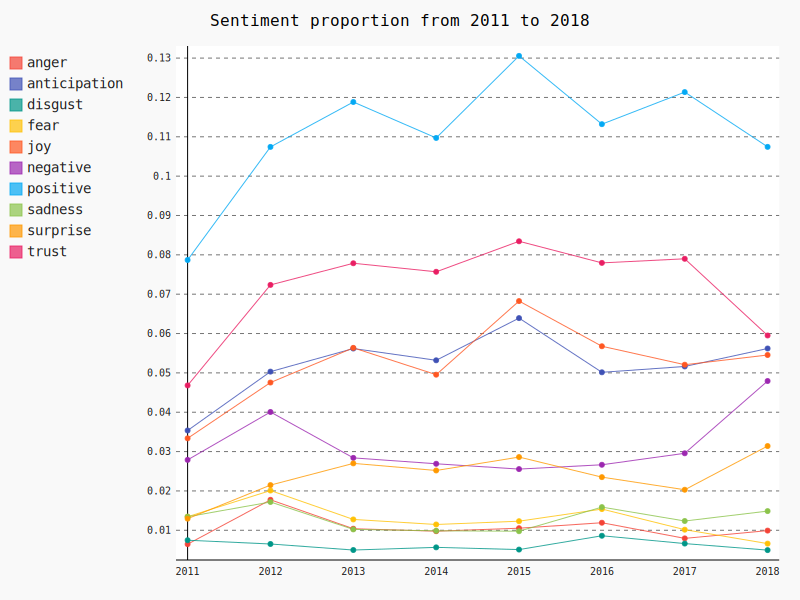

file:///var/folders/dr/dz2s84856qn2sd8hbml1m1fr0000gn/T/tmpe6pdphsi.html


In [17]:
line_chart1 = pygal.Line()
line_chart1.title = 'Sentiment proportion from 2011 to 2018'
line_chart1.x_labels = df_year_feelings_2011_2018.year
for emotion in list(emotions):
       line_chart1.add(emotion, list(df_year_feelings_2011_2018[emotion]))
line_chart1.render_in_browser()

### Calculated by each customers, then aggregate all in a year

In [18]:
years=list(np.unique(df_test['reviewTime']))
df_year_feelings = pd.DataFrame(0, index=years, columns=emotions)
for year in years:
    df_year=df_test.loc[df_test.reviewTime==year,:]
    total_feelings=[0]*10
    whitespace_wt = nltk.WhitespaceTokenizer()
    for review in list(df_year.reviewText):
        text=[]
        words=whitespace_wt.tokenize(str(review))
        for word in words:
            word = stemmer.stem(word.lower())
            if word not in stop_words:
                if word.isalpha():
                    text.append(word)
        word_count=len(text)
        
        feelings=[0]*10
        for word in text:
            emo_score = emo_words[emo_words.word == word]
            if not emo_score.empty:
                temp=[]
                for emotion in list(emotions):
                    temp.append(int(emo_score[emotion]))
                feelings=[i+j for i,j in zip(temp,feelings)]
        if word_count!=0:
            feelings=list(map(lambda x: x/word_count,feelings))
        total_feelings=[i+j for i,j in zip(total_feelings,feelings)]
    total_feelings=list(map(lambda x: x/len(df_year.reviewText),total_feelings))
    
    df_year_feelings.loc[year]=total_feelings
    

In [19]:
df_year_feelings.to_csv("trend_calculated_by_individuals")
df_year_feelings

emotion,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
2006,0.000000,0.047523,0.001481,0.011080,0.066650,0.031185,0.115923,0.012832,0.009742,0.061360
2007,0.010101,0.055556,0.015152,0.015152,0.106061,0.035354,0.202020,0.010101,0.045455,0.101010
2009,0.044776,0.074627,0.029851,0.014925,0.044776,0.104478,0.119403,0.029851,0.014925,0.059701
2011,0.007152,0.037289,0.008131,0.012604,0.035415,0.027598,0.081766,0.012527,0.014292,0.048869
2012,0.013207,0.053380,0.004432,0.016272,0.053392,0.034054,0.117204,0.013244,0.022473,0.078928
2013,0.008630,0.062865,0.003893,0.010384,0.066441,0.025121,0.130043,0.007984,0.029247,0.083180
2014,0.008287,0.069423,0.005262,0.009066,0.068395,0.023303,0.131963,0.008880,0.038222,0.092063
2015,0.009437,0.075910,0.004611,0.010444,0.089010,0.024495,0.159691,0.009361,0.034020,0.091380
2016,0.010551,0.079115,0.009590,0.014273,0.086156,0.026781,0.145475,0.015453,0.044973,0.102231
2017,0.010512,0.064038,0.006523,0.008706,0.088449,0.025755,0.157082,0.010407,0.025580,0.086887


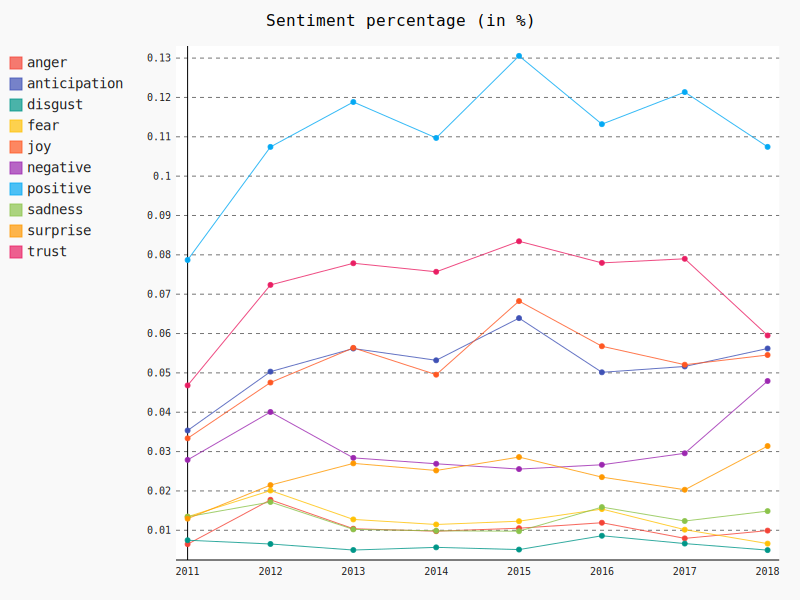

In [20]:
line_chart2 = pygal.Line()
line_chart2.title = 'Sentiment percentage (in %)'
line_chart2.x_labels = df_year_feelings_2011_2018.year
for emotion in list(emotions):
       line_chart2.add(emotion, list(df_year_feelings_2011_2018[emotion]))
line_chart2.render_in_browser()

### Topic

In [21]:
topic=pd.read_csv("travel_topic_modelling.csv")
topic['rank']=topic['rank'].apply(lambda x: x.split(' ')[0].replace(',',''))
topic.head()

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,vote,title,rank,cat1,cat2,dominant_topic
0,488,2.0,False,2016-03-06,A2I1R83M670CND,B000GCFCNC,Heartbreaking. I found this in the library an...,Heartbreakingly BAD,0,NaN,217278,Kindle eBooks,Travel,Author's travel story
1,489,5.0,True,2013-04-22,A1GR0ICQPG5KF6,B000GCFCNC,I kept hoping that Ms. Mayes returned to her ...,Maye's whirlwind trips,0,NaN,217278,Kindle eBooks,Travel,Author's travel story
2,490,4.0,False,2011-12-10,A1E2NA2F4RTQ9B,B000GCFCNC,"When I saw this book was being published, I im...",Perfect summer read,0,NaN,217278,Kindle eBooks,Travel,Author's travel story
3,491,2.0,False,2009-01-18,A2Y38XC6CQYD1I,B000GCFCNC,I have never read any of Ms. Mayes previous bo...,Tedious at best,0,NaN,217278,Kindle eBooks,Travel,Author's travel story
4,492,2.0,False,2007-01-03,A3R9X003XW0LNR,B000GCFCNC,"As with many of the other reviewers, I loved U...",Overdosed on food,0,NaN,217278,Kindle eBooks,Travel,Author's travel story


In [22]:
topics=list(np.unique(topic.dominant_topic))
topics

["Author's travel story",
 'Informative travel book',
 'Kid-friendly place review',
 'Money-saving travel guide',
 'Travel list for a city visit']

In [23]:
topic.loc[:,'reviewTime']=topic.reviewTime.apply(lambda x: x.split('-')[0])
years=list(np.unique(topic.reviewTime))
years

['2006',
 '2007',
 '2009',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [24]:
topic_trend=topic.groupby(['reviewTime','dominant_topic']).reviewText.count().unstack().fillna(0)
topic_trend.to_csv("topic_trend.csv")

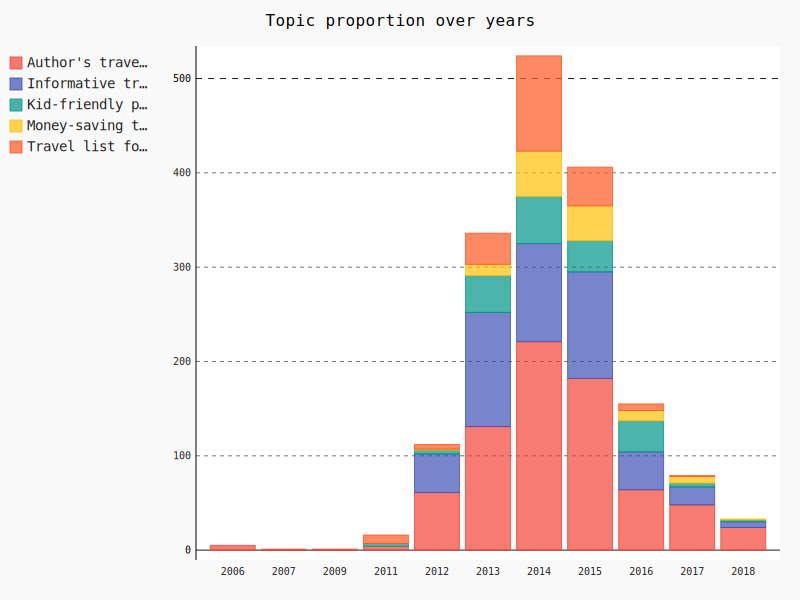

In [40]:
bar_chart = pygal.StackedBar()
bar_chart.title = 'Topic proportion over years'
bar_chart.x_labels = years
for t in topics:
    bar_chart.add(t,list(topic_trend[t]))
bar_chart.render_in_browser()
bar_chart.render_to_file('chart2.svg')

In [26]:
topic_trend1=pd.read_csv("topic_trend1.csv")
topic_trend1

,reviewTime,Author's travel story,Informative travel book,Kid-friendly place review,Money-saving travel guide,Travel list for a city visit
0,2006,1.000000,0.000000,0.000000,0.000000,0.000000
1,2007,1.000000,0.000000,0.000000,0.000000,0.000000
2,2009,1.000000,0.000000,0.000000,0.000000,0.000000
3,2011,0.250000,0.000000,0.187500,0.000000,0.562500
4,2012,0.544643,0.366071,0.035714,0.008929,0.044643
5,2013,0.389881,0.360119,0.116071,0.035714,0.098214
6,2014,0.421756,0.198473,0.095420,0.091603,0.192748
7,2015,0.448276,0.278325,0.081281,0.091133,0.100985
8,2016,0.412903,0.258065,0.212903,0.070968,0.045161
9,2017,0.607595,0.240506,0.050633,0.088608,0.012658


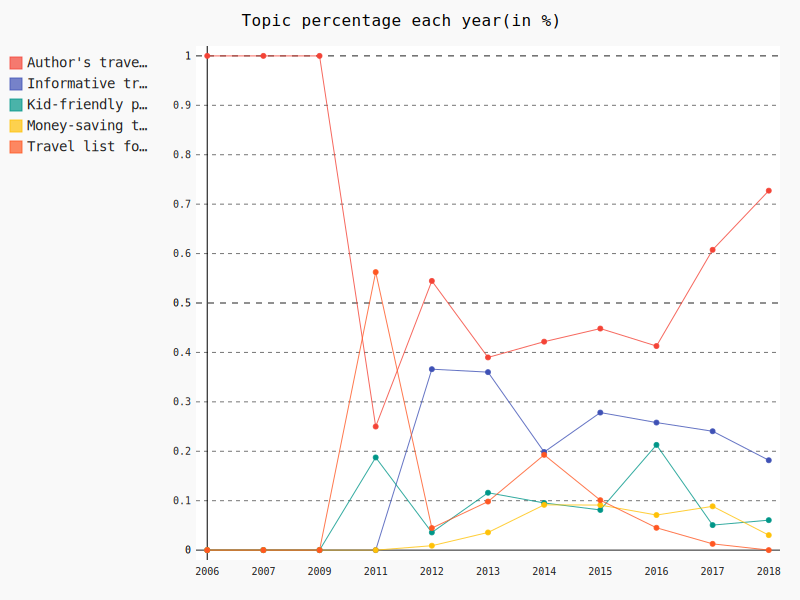

In [27]:
line_chart3 = pygal.Line()
line_chart3.title = 'Topic percentage each year(in %)'
line_chart3.x_labels = years
for t in topics:
       line_chart3.add(t, list(topic_trend1[t]))
line_chart3.render_in_browser()

### What about sentiment of reviews changes in each topic

In [29]:
def plot_topic_sentiment(topic,df1):
    df_test=df1.loc[df1.dominant_topic==topic,:]
    text=[]
    whitespace_wt = nltk.WhitespaceTokenizer()
    for review in list(df_test.reviewText):
        words=whitespace_wt.tokenize(str(review))
        for word in words:
            word = stemmer.stem(word.lower())
            if word not in stop_words:
                if word.isalpha():
                    text.append(word)
    word_count=len(text)
    
    feelings=[0]*10
    for word in text:
        emo_score = emo_words[emo_words.word == word]
        if not emo_score.empty:
            temp=[]
            for emotion in list(emotions):
                temp.append(int(emo_score[emotion]))
            feelings=[i+j for i,j in zip(temp,feelings)]
    
    colors=["slateblue","darkorange","darkcyan","tab:red","pink","gold","tab:green","tab:blue","gray","peru"]
    df_feelings_percentage = pd.DataFrame({"Sentiment":list(emotions), "Percentage":feelings})
    df_feelings_percentage.Percentage = df_feelings_percentage.Percentage.apply(lambda x: x/word_count)
    df_feelings_percentage = df_feelings_percentage.sort_values(axis=0,ascending=False,by=['Percentage'])
    df_feelings_percentage.reset_index(drop=True, inplace=True)
    return(df_feelings_percentage)
    
df_topic1=plot_topic_sentiment("Author's travel story",topic)

In [30]:
df_topic1

,Sentiment,Percentage
0,positive,0.118813
1,trust,0.070708
2,anticipation,0.057828
3,joy,0.057792
4,negative,0.034492
5,surprise,0.023667
6,fear,0.017026
7,sadness,0.015081
8,anger,0.012109
9,disgust,0.008036


In [31]:
df_topic2=plot_topic_sentiment('Informative travel book',topic)

In [32]:
df_topic3=plot_topic_sentiment('Money-saving travel guide',topic)

In [33]:
df_topic4=plot_topic_sentiment('Travel list for a city visit',topic)

In [34]:
df_topic5=plot_topic_sentiment('Kid-friendly place review',topic)

In [35]:
df_topic_1_5=pd.concat([df_topic1,df_topic2.Percentage,df_topic3.Percentage,
                        df_topic4.Percentage,df_topic5.Percentage],axis=1)
df_topic_1_5.columns=['Sentiment',"Author's travel story",'Informative travel book',
                     'Money-saving travel guide','Travel list for a city visit','Kid-friendly place review']
df_topic_1_5

,Sentiment,Author's travel story,Informative travel book,Money-saving travel guide,Travel list for a city visit,Kid-friendly place review
0,positive,0.118813,0.113713,0.125670,0.101807,0.113973
1,trust,0.070708,0.086671,0.087283,0.069501,0.078880
2,anticipation,0.057828,0.055727,0.063264,0.044527,0.051996
3,joy,0.057792,0.055590,0.058117,0.041658,0.049420
4,negative,0.034492,0.028616,0.030238,0.019235,0.030908
5,surprise,0.023667,0.028616,0.015226,0.018385,0.026883
6,fear,0.017026,0.012117,0.009222,0.006908,0.016420
7,sadness,0.015081,0.011227,0.006648,0.006270,0.013361
8,anger,0.012109,0.009516,0.005576,0.005951,0.011912
9,disgust,0.008036,0.004518,0.001716,0.003401,0.006922


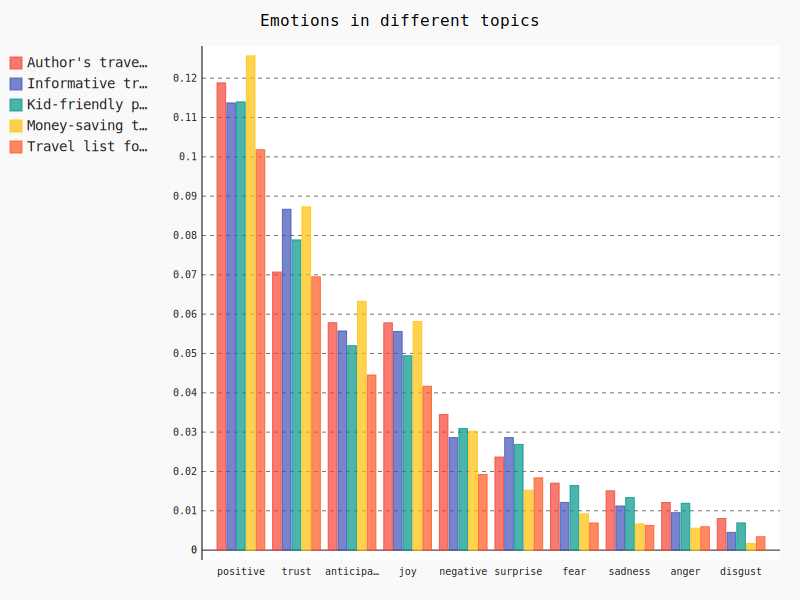

In [36]:
bar_chart1 = pygal.Bar()
bar_chart1.title = 'Emotions in different topics'
bar_chart1.x_labels = list(df_topic_1_5.Sentiment)
for t in topics:
    bar_chart1.add(t, df_topic_1_5[t])
bar_chart1.render_in_browser()